# import packages for running this demo

## import packages

In [48]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import MultipleLocator

## check version

In [7]:
print('matplotlib version:', matplotlib.__version__)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

matplotlib version: 3.2.1
pandas version: 0.25.3
numpy version: 1.19.5


## check the core number of cpu and memory

In [391]:
import psutil

In [393]:
cpul = psutil.cpu_count()
print('core number of CPU is:', cpul)

core number of cpus is: 2


In [394]:
mem = psutil.virtual_memory()
mem1 = str(mem.total/1024/1024/1024)
mem2 = str(mem.free/1024/1024/1024)
print("total memory is:", mem1[0:3], "G")

total memory is: 7.6 G


# example of first order low pass filter

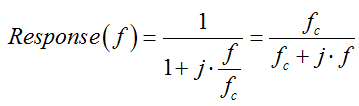

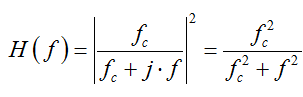

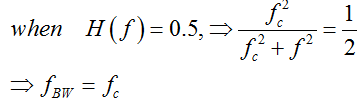

In [70]:
def gain_response(fc=0.5, N_samples=100, plot_show=False, add_noise=False):
    f = np.linspace(0, 5, N_samples)
    gain = fc**2/(fc**2+f**2)
    if add_noise == True:
        factor = 0.05  # factor
        gain += np.random.random(N_samples)*factor
    if plot_show == True:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(f, gain)
        ax.annotate('3dB Bw point', xy=(fc, 0.5), xytext=(fc+0.4, 0.7),
                    arrowprops=dict(facecolor='red', shrink=0.05))
        plt.scatter([fc], [0.5], c='red', marker='*')
        plt.xlabel('frequency(Hz)')
        plt.ylabel('Normalized Gain')
        plt.grid()
        ax.set_xlim(0, 5)
        x_major_locator = MultipleLocator(0.5)
        ax.xaxis.set_major_locator(x_major_locator)
        y_major_locator = MultipleLocator(0.1)
        ax.yaxis.set_major_locator(y_major_locator)
        if add_noise == False:
            plt.title('ideal first order low pass filter')
        else:
            plt.title('noisy first order low pass filter')
        plt.show()
    return list(f), list(gain)

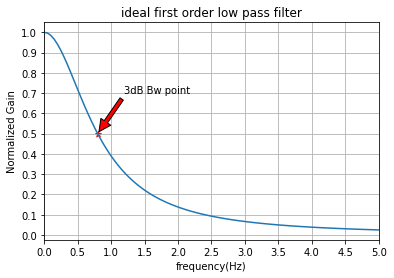

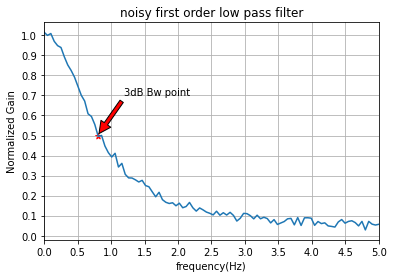

In [71]:
_,_ = gain_response(fc=0.8,N_samples=100,plot_show = True,add_noise=False)

_,_ = gain_response(fc=0.8,N_samples=100,plot_show = True,add_noise=True)

# Conventional Method

## Method I: Conventional Method

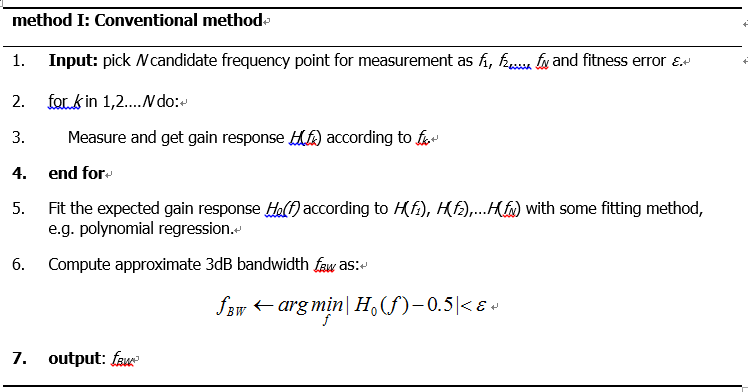

In [347]:
def conventional_method(f, gain, debug=False):
    N = len(f)-1
    error = np.inf
    f_BW = f[0]
    F_BW = []
    Errors = [error]
    Rrrors_rate = [0]
    for k in range(N):
        if abs(gain[k] - 0.5) < error:
            error = abs(gain[k] - 0.5)
            f_BW = f[k]
            F_BW.append(f_BW)
            Errors.append(error)
            convergence_rate = Errors[-2]/Errors[-1]
            Rrrors_rate.append(convergence_rate)
    if debug == False:
        return f_BW, error
    else:
        return f_BW, error, F_BW, Errors, Rrrors_rate

In [349]:
f, gain = gain_response(fc=0.76, N_samples=1000,
                        plot_show=False, add_noise=False)

f_BW, error, F_BW, Errors, Errors_rate = conventional_method(
    f, gain, debug=True)
print('f_BW', f_BW)
print('final_error', error)
conventional_method_results = {'estimated_f_BW': F_BW, 'fitness error': Errors[0:len(
    Errors)-1], 'Convergence_rate': Errors_rate[0:len(Errors)-1]}
conventional_method_results = DataFrame(conventional_method_results)
conventional_method_results

f_BW 0.7607607607607607
final_error 0.0005002499998748577


,estimated_f_BW,fitness error,Convergence_rate
0,0.000000,inf,0.000000
1,0.005005,0.500000,inf
2,0.010010,0.499957,1.000087
3,0.015015,0.499827,1.000260
4,0.020020,0.499610,1.000434
...,...,...,...
148,0.740741,0.016218,1.210173
149,0.745746,0.012831,1.263967
150,0.750751,0.009466,1.355528
151,0.755756,0.006122,1.546168


In [385]:
a = np.array(Errors_rate[2:])
a.mean()

12.9764114537474

In [344]:
len(Errors_rate)

154

## Method II: Posteriori Method

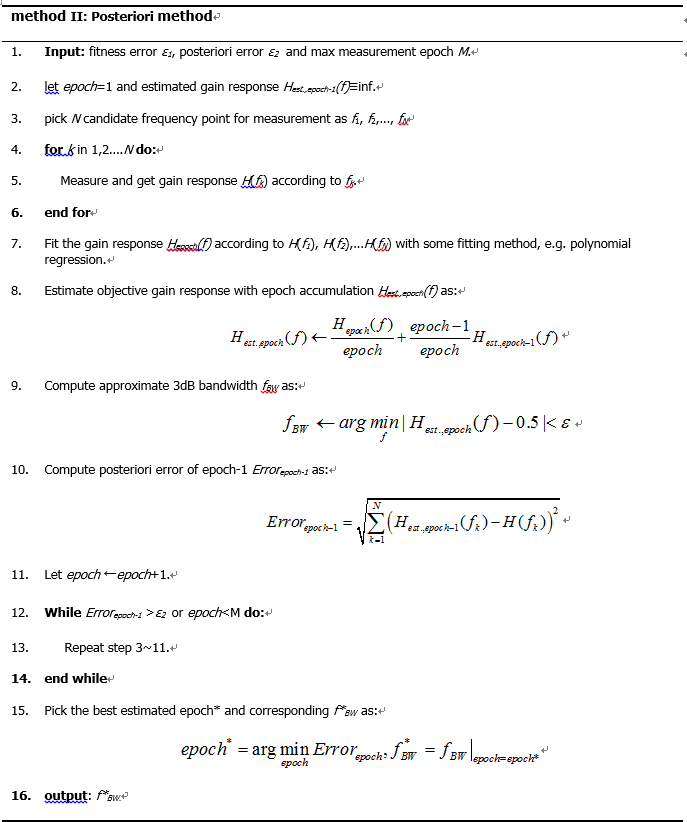

In [330]:
#TODO too complex

## Method III: Binary Search Method

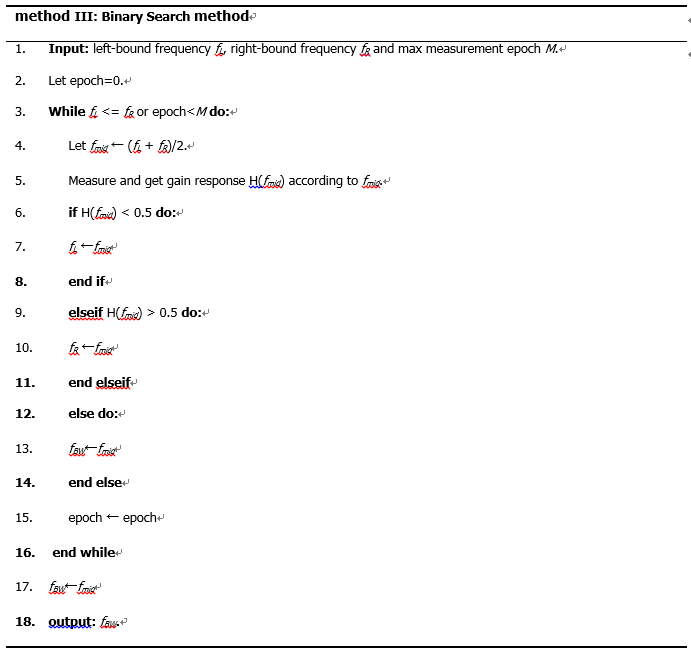

In [350]:
def binary_search(f, gain, max_iter, error, debug= False):
    F = []
    Errors = [np.inf]
    Errors_rate = []
    left = 0
    right = len(f) - 1
    iter = 1
    mid = (left + right)//2
    while left <= right and iter <= max_iter and abs(gain[mid] - 0.5) > error:
        mid = (left + right)//2
        if gain[mid] > 0.5:
            left = mid + 1
        elif gain[mid] < 0.5:
            right = mid - 1
        else:
            return f[mid], abs(gain[mid] - 0.5)
        iter += 1
        F.append(f[mid])
        Errors.append(abs(gain[mid] - 0.5))
        Errors_rate.append(Errors[-2]/Errors[-1])
    if debug == False:
        return f[mid], abs(gain[mid] - 0.5)
    else:
        return f[mid], abs(gain[mid] - 0.5), F, Errors, Errors_rate

In [357]:
f, gain = gain_response(fc=0.76, N_samples=1000,
                        plot_show=False, add_noise=False)
f_BW, error, F, Errors, Errors_rate = binary_search(
    f, gain, max_iter=1000, error=0.001, debug=True)
print('f_BW:', f_BW)
print('final_error', error)
Binary_search_result = {'estimated_f': F,
                        'fitness_error': Errors[0:len(Errors)-1], 'Convergence_rate': Errors_rate[0:len(Errors)-1]}
Binary_search_result = DataFrame(Binary_search_result)
Binary_search_result

f_BW: 0.7607607607607607
final_error 0.0005002499998748577


,estimated_f,fitness_error,Convergence_rate
0,2.497497,inf,inf
1,1.246246,0.415247,1.813946
2,0.620621,0.228919,2.290666
3,0.930931,0.099936,0.998713
4,0.775776,0.100064,9.742319
5,0.695696,0.010271,0.232967
6,0.735736,0.044088,2.718472
7,0.755756,0.016218,5.792023
8,0.765766,0.002800,0.740977
9,0.760761,0.003779,7.553980


In [386]:
a = np.array(Errors_rate[2:])
a.mean()

12.9764114537474

## Method IV: Gradient Descent Method

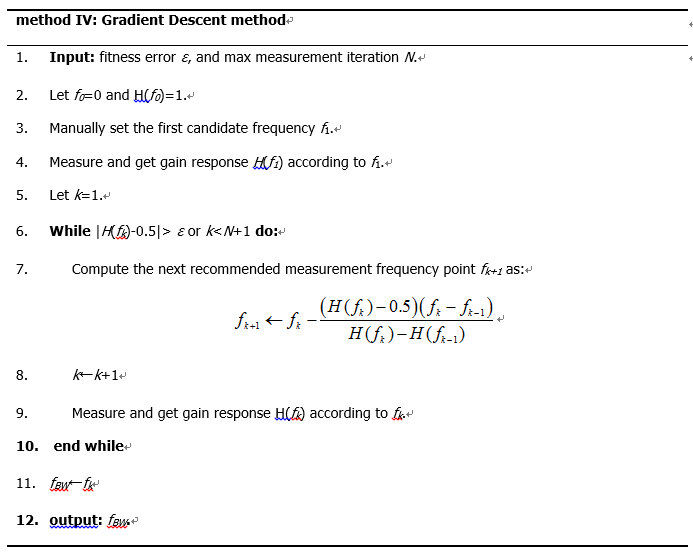

In [370]:
def gradient_descent(fc, max_iter, error_th, debug=False):

    F = []
    G = []
    G1 = []
    Errors_rate = [0]
    f = 0
    gain = fc**2/(fc**2 + f**2) - 0.5
    g1 = np.inf
    F.append(f)
    G.append(gain)
    G1.append(g1)
    f = 1
    gain = fc**2/(fc**2 + f**2) - 0.5
    F.append(f)
    G.append(gain)
    g1 = (G[1] - G[0])/(F[1] - F[0])
    G1.append(g1)
    error = abs(G[1])
    Errors_rate.append(abs(G[0]/G[1]))
    k = 1
    while error > error_th and k < max_iter:
        g1 = (G[k] - G[k-1]) / ((F[k] - F[k-1]) + 1e-6)
        f = F[k] - G[k]/(g1 + 1e-5)
#        f = F[k] - G[k]*(F[k] - F[k-1])/((G[k] - G[k-1]) + error_th)
        gain = fc**2/(fc**2 + f**2) - 0.5
        F.append(f)
        G.append(gain)
        G1.append(g1)
        error = abs(G[k+1])
        Errors_rate.append(abs(G[-2]/G[-1]))
        k += 1
    if debug == False:
        return F[-1], error
    else:
        return F[-1], error, F, G, G1, Errors_rate

In [371]:
f_BW, error, F, G, G1,Errors_rate = gradient_descent(
    fc=0.776, max_iter=1000, error_th=0.001, debug=True)
print('f_BW:', f_BW)
print('final_error', error)
Gradient_descent_result = {'estimated_f': F, 'Gain': G,
                           'estimated_gradient': G1, 'fitness_error': G,'Convergence_rate':Errors_rate}
Gradient_descent_result = DataFrame(Gradient_descent_result)
Gradient_descent_result

f_BW: 0.7760676577878387
final_error 4.35920350318475e-05


,estimated_f,Gain,estimated_gradient,fitness_error,Convergence_rate
0,0.000000,0.500000,inf,0.500000,0.000000
1,1.000000,-0.124151,-0.624151,-0.124151,4.027349
2,0.801085,-0.015902,-0.624151,-0.015902,7.807432
3,0.771864,0.002672,-0.544201,0.002672,5.950960
4,0.776068,-0.000044,-0.635659,-0.000044,61.298300


In [389]:
sum = 0
for num in Errors_rate:
    sum +=num
sum/len(Errors_rate)

oo

## Method V: Newton Iteration Method

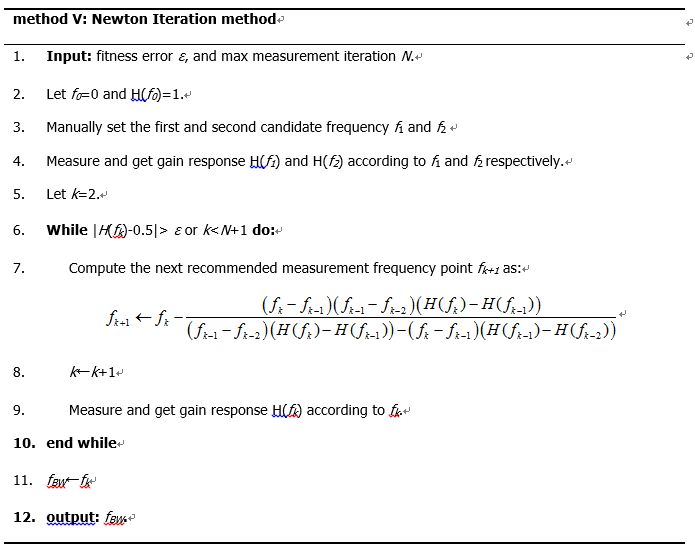

In [372]:
import sympy as sy


def FunValue(x0, f):
    result = f.subs(x, x0)
    return result


def Newton_iteration(x0, f, df, max_iter, error_th, debug=False):
    k = 0
    F = []
    G = []
    G1 = []
    G2 = []
    Errors = [np.inf]
    Errors_rate = [0]
    while True:
        tempx = x0
        G.append(FunValue(x0, f))
        G1.append(FunValue(x0, df))
        G2.append(FunValue(x0, sy.diff(df)))
        x0 = x0 - FunValue(x0, df)/FunValue(x0, sy.diff(df))
        F.append(x0)
        k += 1
        error = abs(x0 - tempx)
        Errors_rate.append(Errors[-1]/error)
        Errors.append(error)
        if error < error_th:  # meet the error threshold, end
            break

        elif k > max_iter:  # exceed the max iteration, end
            break
            print("non-convergence, have to stop")
    f_bw = x0
    if debug == False:
        return f_bw, Errors[-1]
    else:
        return f_bw, error, F, G, G1, G2, Errors, Errors_rate

In [378]:
x = sy.symbols("x")
fc = 0.776
f = 0.5*((fc**2/(fc**2 + x**2)) - 0.5)**2
#print(f)
df = -2.0 * ((fc**2/(fc**2 + x**2)) - 0.5) * fc**2 * (fc**2 + x**2)**(-2)
#print(df)
x0 = 0.6

In [390]:
f_BW, error, F, G, G1, G2, Errors, Errors_rate = Newton_iteration(
    x0, f, df, max_iter=1000, error_th=0.001, debug=True)

print('f_BW:', f_BW)
print('final_error', error)
Newton_iteration_result = {'estimated_f': F, 'Gain': G,
                           'estimated_gradient': G1, 'estimated_curve_rate': G2, 'fitness_error': Errors[1:len(Errors)], 'Convergence_rate': Errors_rate[1:len(Errors_rate)]}
Newton_iteration_result = DataFrame(Newton_iteration_result)
Newton_iteration_result

f_BW: 0.775999697040867
final_error 0.000306511634439066


,estimated_f,Gain,estimated_gradient,estimated_curve_rate,fitness_error,Convergence_rate
0,0.714987556027186,0.00791886932920562,-0.163715946986196,1.42377099438038,0.114987556027186,oo
1,0.766079763358959,0.000834460074716474,-0.0396900718706966,0.776832200906192,0.0510922073317729,2.25058892602744
2,0.775693185406428,2.06901885214087e-5,-0.00547958104354897,0.569992768079029,0.00961342204746929,5.31467432507270
3,0.775999697040867,1.95483582962240e-8,-0.000164308536453008,0.536059705380280,0.000306511634439066,31.3639711101420


# Comprehensive evaluation

In [327]:
L_name = ['Conventional', 'Binary Search',
          'Gradient Descent', 'Newton Iteration']
L_Acc = ['Low','High', 'High', 'High']
L_speed = ['Medium','Medium', 'High', 'High']
L_memory_cost = ['Low','Medium', 'Medium', 'High']

In [328]:
from pandas.core.frame import DataFrame
evaluation = {'Method': L_name, 'Accuracy': L_Acc,
              'Speed': L_speed, 'Memory_cost': L_memory_cost}
Evalatation_results = DataFrame(evaluation)
Evalatation_results

,Method,Accuracy,Speed,Memory_cost
0,Conventional,Low,Medium,Low
1,Binary Search,High,Medium,Medium
2,Gradient Descent,High,High,Medium
3,Newton Iteration,High,High,High
